In [1]:
import pandas as pd
import numpy as np
import pickle
import matplotlib.pyplot as plt 
import seaborn as sns

In [9]:
#dataset = pickle.load(open('Datasets/data.p', 'rb'))
dataset = pickle.load(open('Datasets/data_FEC_NATIONALPOLL_DEMOGRAPHICSIMPUTED_DISTRICTMIXED_2004_2018.p', 'rb'))
dataset.columns, dataset.shape

(Index(['district', 'state', 'year', 'party', 'candidatevotes', 'totalvotes',
        'candidate', 'national_poll', 'national_poll_prev',
        'national_poll_delta_subtract', 'national_poll_delta_divide',
        'previous_party', 'dem_win_margin_prev', 'rep_win_margin_prev',
        'margin_signed_minus_prev', 'margin_signed_divide_prev',
        'margin_unsigned_minus_prev', 'margin_unsigned_divide_prev',
        'dem_win_prev', 'rep_win_prev', 'dem_win', 'rep_win', 'female_pct',
        'age18_24_pct', 'age25_34_pct', 'median_age', 'unmarried_partner_pct',
        'male_living_alone_pct', 'bachelors_deg_or_higher_pct',
        'past_year_births_to_unmarried_women_pct', 'civilian_veteran_pct',
        'live_same_house_past_year_pct',
        'foreign_born_proportion_from_LatinAmerica',
        'speak_other_language_at_home_pct', 'labor_force_unemployed_pct',
        'public_transit_commuter_pct', 'no_health_insurance_pct',
        'poverty_rate_pct', 'median_housing_value', 'media

In [10]:
margin_winner_cols = ['margin_signed_minus_prev', 'margin_signed_divide_prev', 'margin_unsigned_minus_prev', 'margin_unsigned_divide_prev', 'dem_win_prev']
margin_cols = ['margin_signed_minus_prev', 'margin_signed_divide_prev', 'margin_unsigned_minus_prev', 'margin_unsigned_divide_prev']
changeMargins = dataset.loc[dataset['dem_win'] != dataset['dem_win_prev'], margin_winner_cols]
noChangeMargins = dataset.loc[dataset['dem_win'] == dataset['dem_win_prev'], margin_winner_cols]
noChangeMargins.shape, changeMargins.shape

((3142, 5), (289, 5))

C:\Users\m\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
C:\Users\m\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


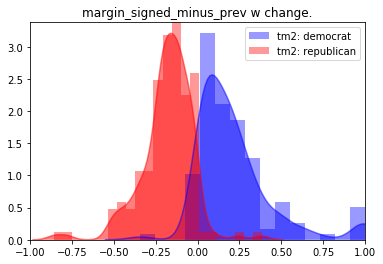

C:\Users\m\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
C:\Users\m\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


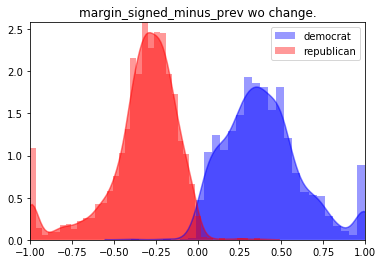

C:\Users\m\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
C:\Users\m\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


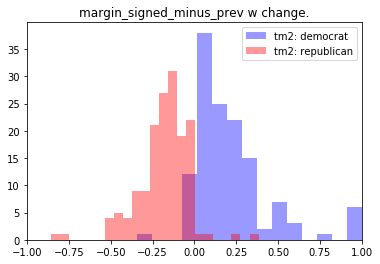

C:\Users\m\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
C:\Users\m\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


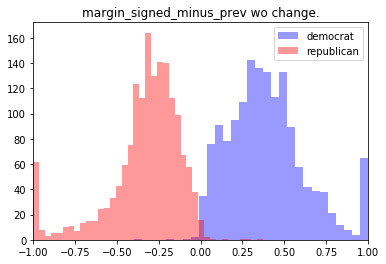

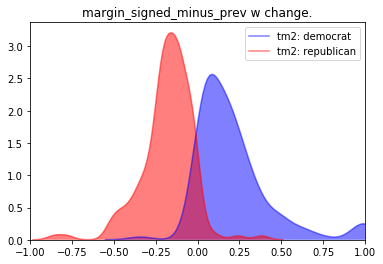

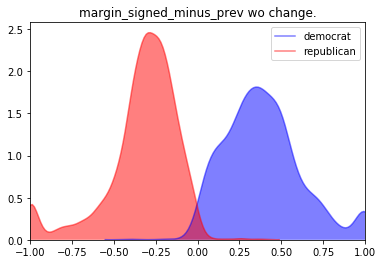

In [11]:
kde_alpha = 0.5
hist_alpha = 0.4

dem_data_change = changeMargins.loc[changeMargins['dem_win_prev'] == 1, 'margin_signed_minus_prev'].values
rep_data_change = changeMargins.loc[changeMargins['dem_win_prev'] == 0, 'margin_signed_minus_prev'].values

dem_data_no_change = noChangeMargins.loc[noChangeMargins['dem_win_prev'] == 1, 'margin_signed_minus_prev'].values
rep_data_no_change = noChangeMargins.loc[noChangeMargins['dem_win_prev'] == 0, 'margin_signed_minus_prev'].values


dem_data_change = dem_data_change[~np.isnan(dem_data_change)]
rep_data_change = rep_data_change[~np.isnan(rep_data_change)]

dem_data_no_change = dem_data_no_change[~np.isnan(dem_data_no_change)]
rep_data_no_change = rep_data_no_change[~np.isnan(rep_data_no_change)]

plt.title('margin_signed_minus_prev w change.')
sns.distplot(dem_data_change, color='b', kde_kws={'shade': True, 'alpha': kde_alpha}, hist_kws={'alpha': hist_alpha}, label='tm2: democrat')
sns.distplot(rep_data_change, color='r', kde_kws={'shade': True, 'alpha': kde_alpha}, hist_kws={'alpha': hist_alpha}, label='tm2: republican')
plt.xlim(-1,1)
plt.legend()
plt.show()    

plt.title('margin_signed_minus_prev wo change.')
sns.distplot(dem_data_no_change, color='b', kde_kws={'shade': True, 'alpha': kde_alpha}, hist_kws={'alpha': hist_alpha}, label='democrat')
sns.distplot(rep_data_no_change, color='r', kde_kws={'shade': True, 'alpha': kde_alpha}, hist_kws={'alpha': hist_alpha}, label='republican')
plt.xlim(-1,1)
plt.legend()
plt.show()  

plt.title('margin_signed_minus_prev w change.')
sns.distplot(dem_data_change, color='b', kde_kws={'shade': True, 'alpha': kde_alpha}, hist_kws={'alpha': hist_alpha}, label='tm2: democrat', kde=False)
sns.distplot(rep_data_change, color='r', kde_kws={'shade': True, 'alpha': kde_alpha}, hist_kws={'alpha': hist_alpha}, label='tm2: republican', kde=False)
plt.xlim(-1,1)
plt.legend()
plt.show()    

plt.title('margin_signed_minus_prev wo change.')
sns.distplot(dem_data_no_change, color='b', kde_kws={'shade': True, 'alpha': kde_alpha}, hist_kws={'alpha': hist_alpha}, label='democrat', kde=False)
sns.distplot(rep_data_no_change, color='r', kde_kws={'shade': True, 'alpha': kde_alpha}, hist_kws={'alpha': hist_alpha}, label='republican', kde=False)
plt.xlim(-1,1)
plt.legend()
plt.show() 

plt.title('margin_signed_minus_prev w change.')
sns.distplot(dem_data_change, color='b', kde_kws={'shade': True, 'alpha': kde_alpha}, hist_kws={'alpha': hist_alpha}, label='tm2: democrat', hist=False)
sns.distplot(rep_data_change, color='r', kde_kws={'shade': True, 'alpha': kde_alpha}, hist_kws={'alpha': hist_alpha}, label='tm2: republican', hist=False)
plt.xlim(-1,1)
plt.legend()
plt.show()    

plt.title('margin_signed_minus_prev wo change.')
sns.distplot(dem_data_no_change, color='b', kde_kws={'shade': True, 'alpha': kde_alpha}, hist_kws={'alpha': hist_alpha}, label='democrat', hist=False)
sns.distplot(rep_data_no_change, color='r', kde_kws={'shade': True, 'alpha': kde_alpha}, hist_kws={'alpha': hist_alpha}, label='republican', hist=False)
plt.xlim(-1,1)
plt.legend()
plt.show() 

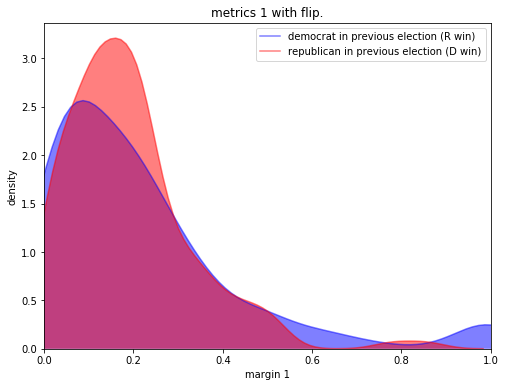

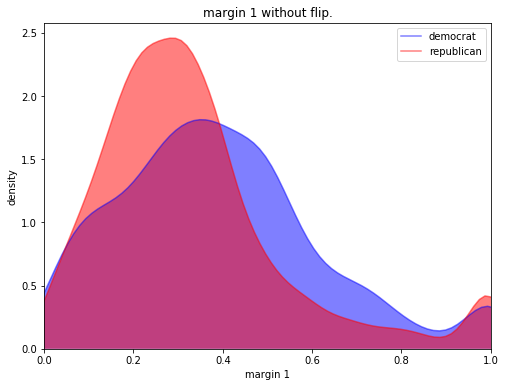

<Figure size 576x432 with 0 Axes>

In [24]:
kde_alpha = 0.5
hist_alpha = 0.4

dem_data_change = changeMargins.loc[changeMargins['dem_win_prev'] == 1, 'margin_unsigned_minus_prev'].values
rep_data_change = changeMargins.loc[changeMargins['dem_win_prev'] == 0, 'margin_unsigned_minus_prev'].values

dem_data_no_change = noChangeMargins.loc[noChangeMargins['dem_win_prev'] == 1, 'margin_unsigned_minus_prev'].values
rep_data_no_change = noChangeMargins.loc[noChangeMargins['dem_win_prev'] == 0, 'margin_unsigned_minus_prev'].values


dem_data_change = dem_data_change[~np.isnan(dem_data_change)]
rep_data_change = rep_data_change[~np.isnan(rep_data_change)]

dem_data_no_change = dem_data_no_change[~np.isnan(dem_data_no_change)]
rep_data_no_change = rep_data_no_change[~np.isnan(rep_data_no_change)]

plt.rcParams["figure.figsize"] = (8,6)

# plt.title('margin_unsigned_minus_prev w change.')
# sns.distplot(dem_data_change, color='b', kde_kws={'shade': True, 'alpha': kde_alpha}, hist_kws={'alpha': hist_alpha}, label='tm2: democrat')
# sns.distplot(rep_data_change, color='r', kde_kws={'shade': True, 'alpha': kde_alpha}, hist_kws={'alpha': hist_alpha}, label='tm2: republican')
# plt.xlim(0,1)
# plt.legend()
# plt.show()    

# plt.title('margin_unsigned_minus_prev wo change.')
# sns.distplot(dem_data_no_change, color='b', kde_kws={'shade': True, 'alpha': kde_alpha}, hist_kws={'alpha': hist_alpha}, label='democrat')
# sns.distplot(rep_data_no_change, color='r', kde_kws={'shade': True, 'alpha': kde_alpha}, hist_kws={'alpha': hist_alpha}, label='republican')
# plt.xlim(0,1)
# plt.legend()
# plt.show()    

# plt.title('margin_unsigned_minus_prev w change.')
# sns.distplot(dem_data_change, color='b', kde_kws={'shade': True, 'alpha': kde_alpha}, hist_kws={'alpha': hist_alpha}, label='tm2: democrat', kde=False)
# sns.distplot(rep_data_change, color='r', kde_kws={'shade': True, 'alpha': kde_alpha}, hist_kws={'alpha': hist_alpha}, label='tm2: republican', kde=False)
# plt.xlim(0,1)
# plt.legend()
# plt.show()    

# plt.title('margin_unsigned_minus_prev wo change.')
# sns.distplot(dem_data_no_change, color='b', kde_kws={'shade': True, 'alpha': kde_alpha}, hist_kws={'alpha': hist_alpha}, label='democrat', kde=False)
# sns.distplot(rep_data_no_change, color='r', kde_kws={'shade': True, 'alpha': kde_alpha}, hist_kws={'alpha': hist_alpha}, label='republican', kde=False)
# plt.xlim(0,1)
# plt.legend()
# plt.show()    


plt.title('metrics 1 with flip.')
plt.xlabel('margin 1')
plt.ylabel('density')
sns.distplot(dem_data_change, color='b', kde_kws={'shade': True, 'alpha': kde_alpha}, hist_kws={'alpha': hist_alpha}, label='democrat in previous election (R win)', hist=False)
sns.distplot(rep_data_change, color='r', kde_kws={'shade': True, 'alpha': kde_alpha}, hist_kws={'alpha': hist_alpha}, label='republican in previous election (D win)', hist=False)
plt.xlim(0,1)
plt.legend()
plt.show()    
plt.savefig('test1.png')

plt.title('margin 1 without flip.')
plt.xlabel('margin 1')
plt.ylabel('density')
sns.distplot(dem_data_no_change, color='b', kde_kws={'shade': True, 'alpha': kde_alpha}, hist_kws={'alpha': hist_alpha}, label='democrat', hist=False)
sns.distplot(rep_data_no_change, color='r', kde_kws={'shade': True, 'alpha': kde_alpha}, hist_kws={'alpha': hist_alpha}, label='republican', hist=False)
plt.xlim(0,1)
plt.legend()
plt.show()    
plt.savefig('test2.png')

In [35]:
reset

Once deleted, variables cannot be recovered. Proceed (y/[n])? y
